#Exploratory Spatial Data Analysis for Hilden city

In [1]:
import geopandas as gpd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = 'https://raw.github.com/ssujit/move_sustainable/main/data/'

# variable declaration
wkam = 'wkamo_hdn.gpkg' # wkamo: weekdays peak-trafffic morning hours (6:00-8:59) 
wkpm = 'wkpmo_hdn.gpkg' # wkamo: weekdays peak-trafffic afternoon hours (14:00-16:59) 
satam = 'satamo_hdn.gpkg' # satamo: Saturday peak-trafffic morning hours (6:00-8:59) 
satpm = 'satpmo_hdn.gpkg' # satpmo: Saturday peak-trafffic afternoon hours (14:00-16:59)  
sunam = 'sunamo_hdn.gpkg' # sunamo: Sunday peak-trafffic morning hours (6:00-8:59)
sunpm = 'sunamo_hdn.gpkg' # sanpmo: Sunday peak-trafffic afternoon hours (14:00-16:59) 

#read the files
wk_am = gpd.read_file(f'{url}{wkam}')
wk_pm = gpd.read_file(f'{url}{wkpm}')
sat_am = gpd.read_file(f'{url}{satam}')
sat_pm = gpd.read_file(f'{url}{satpm}')
sun_am = gpd.read_file(f'{url}{sunam}')
sun_pm = gpd.read_file(f'{url}{sunpm}')

In [3]:
wk_am.head()

,VALUE,grid_name,net_dis,perH_sum,pti,geometry
0,768.94497,2,769,24.665,0.032076,"POLYGON ((354747.343 5672460.510, 355828.624 5..."
1,855.81989,3,856,9.000,0.010516,"POLYGON ((355828.624 5672460.510, 356909.906 5..."
2,988.74922,4,989,NaN,NaN,"POLYGON ((356909.906 5672460.510, 357991.187 5..."
3,707.28729,5,707,12.000,0.016966,"POLYGON ((353666.061 5671273.733, 354747.343 5..."
4,166.20974,6,166,61.335,0.369022,"POLYGON ((354747.343 5671273.733, 355828.624 5..."


In [4]:
wk_am.shape

(22, 6)

<Axes: >

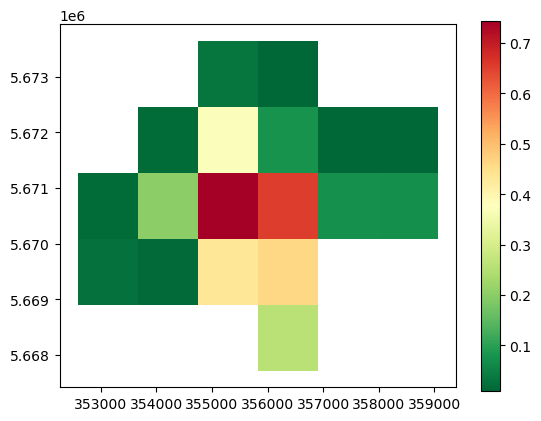

In [5]:
wk_am.plot("pti", cmap="RdYlGn_r", legend=True)

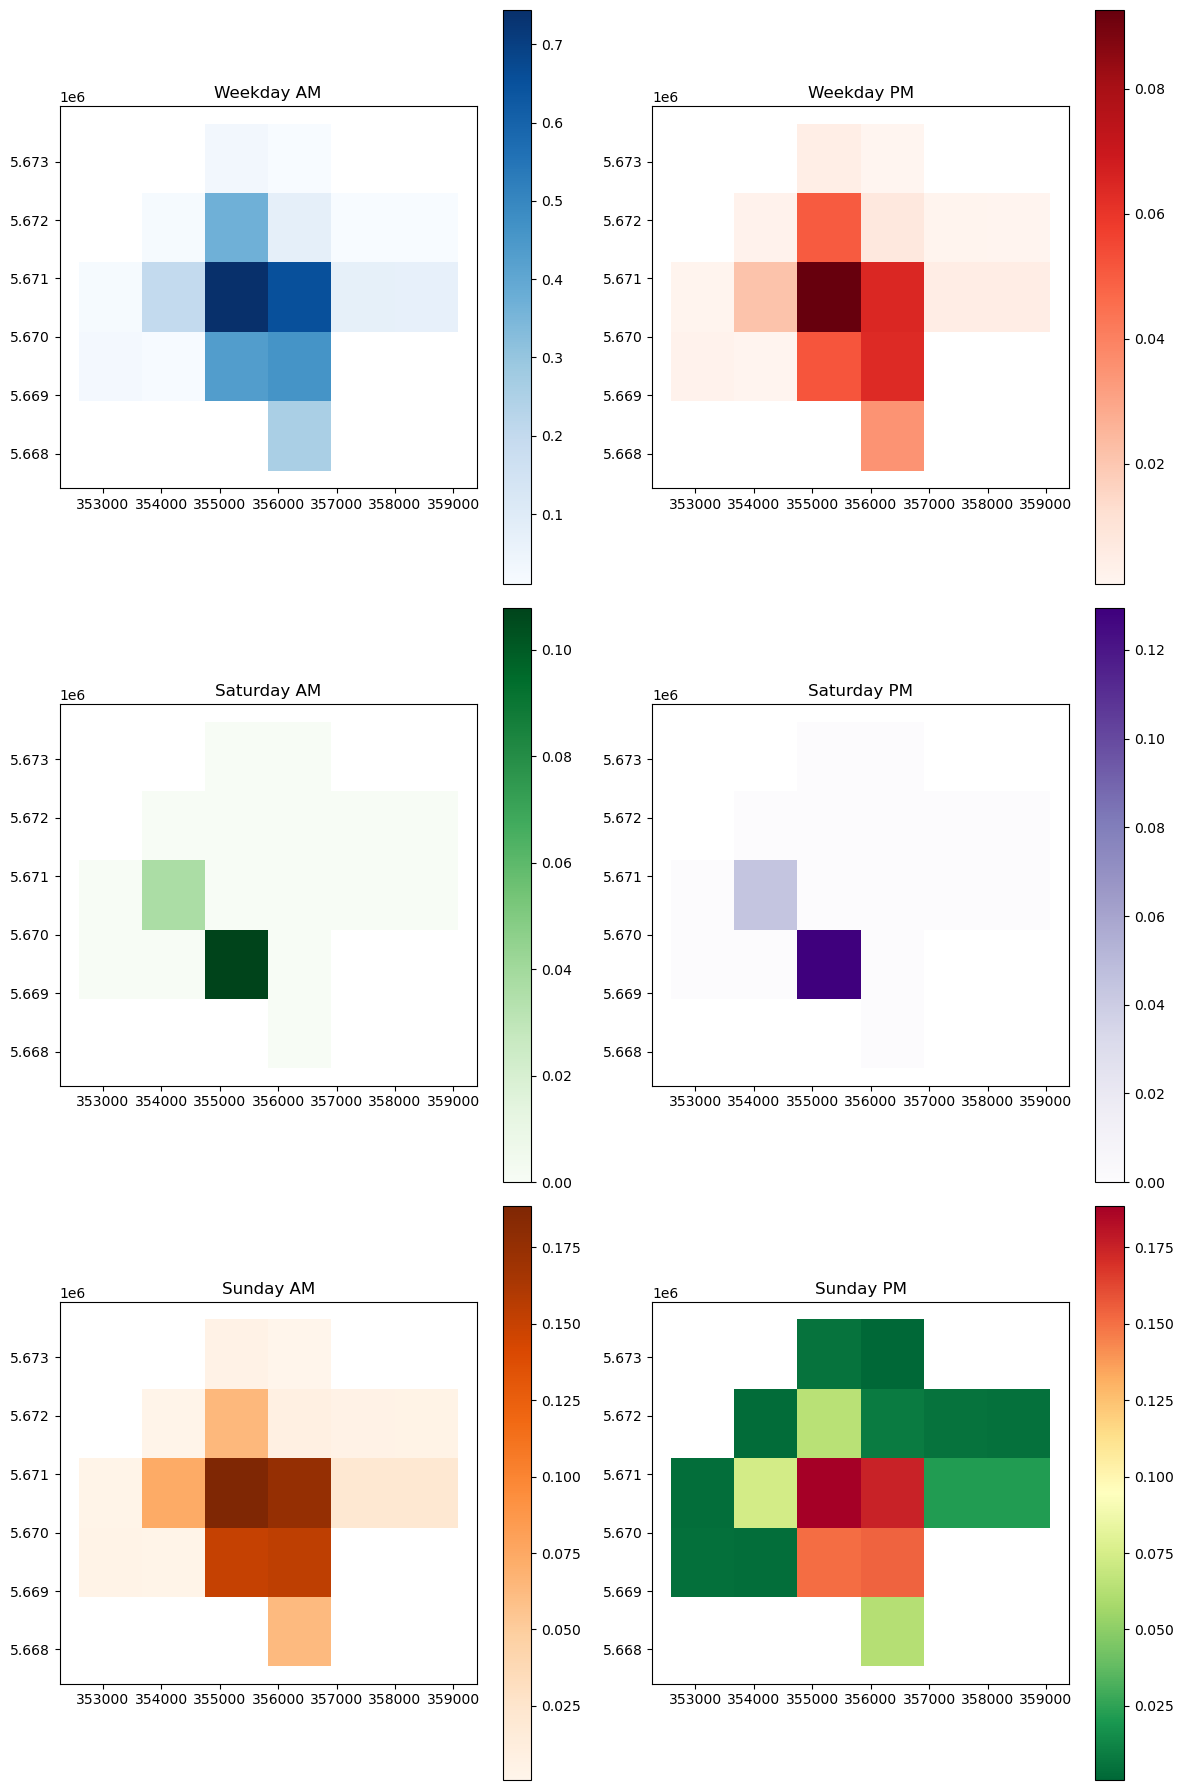

In [6]:
# Set up subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

wk_am.plot("pti", cmap="Blues", legend=True, ax=axes[0, 0])
axes[0, 0].set_title("Weekday AM")

wk_pm.plot("pti", cmap="Reds", legend=True, ax=axes[0, 1])
axes[0, 1].set_title("Weekday PM")

sat_am.plot("pti", cmap="Greens", legend=True, ax=axes[1, 0])
axes[1, 0].set_title("Saturday AM")

sat_pm.plot("pti", cmap="Purples", legend=True, ax=axes[1, 1])
axes[1, 1].set_title("Saturday PM")

sun_am.plot("pti", cmap="Oranges", legend=True, ax=axes[2, 0])
axes[2, 0].set_title("Sunday AM")

sun_pm.plot("pti", cmap="RdYlGn_r", legend=True, ax=axes[2, 1])
axes[2, 1].set_title("Sunday PM")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

array([[<Axes: title={'center': 'pti'}>]], dtype=object)

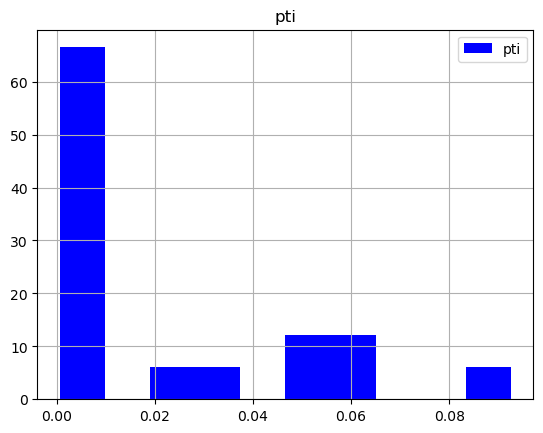

In [7]:
wk_pm.hist("pti", color = 'blue', edgecolor = 'None', density = True, legend=True)

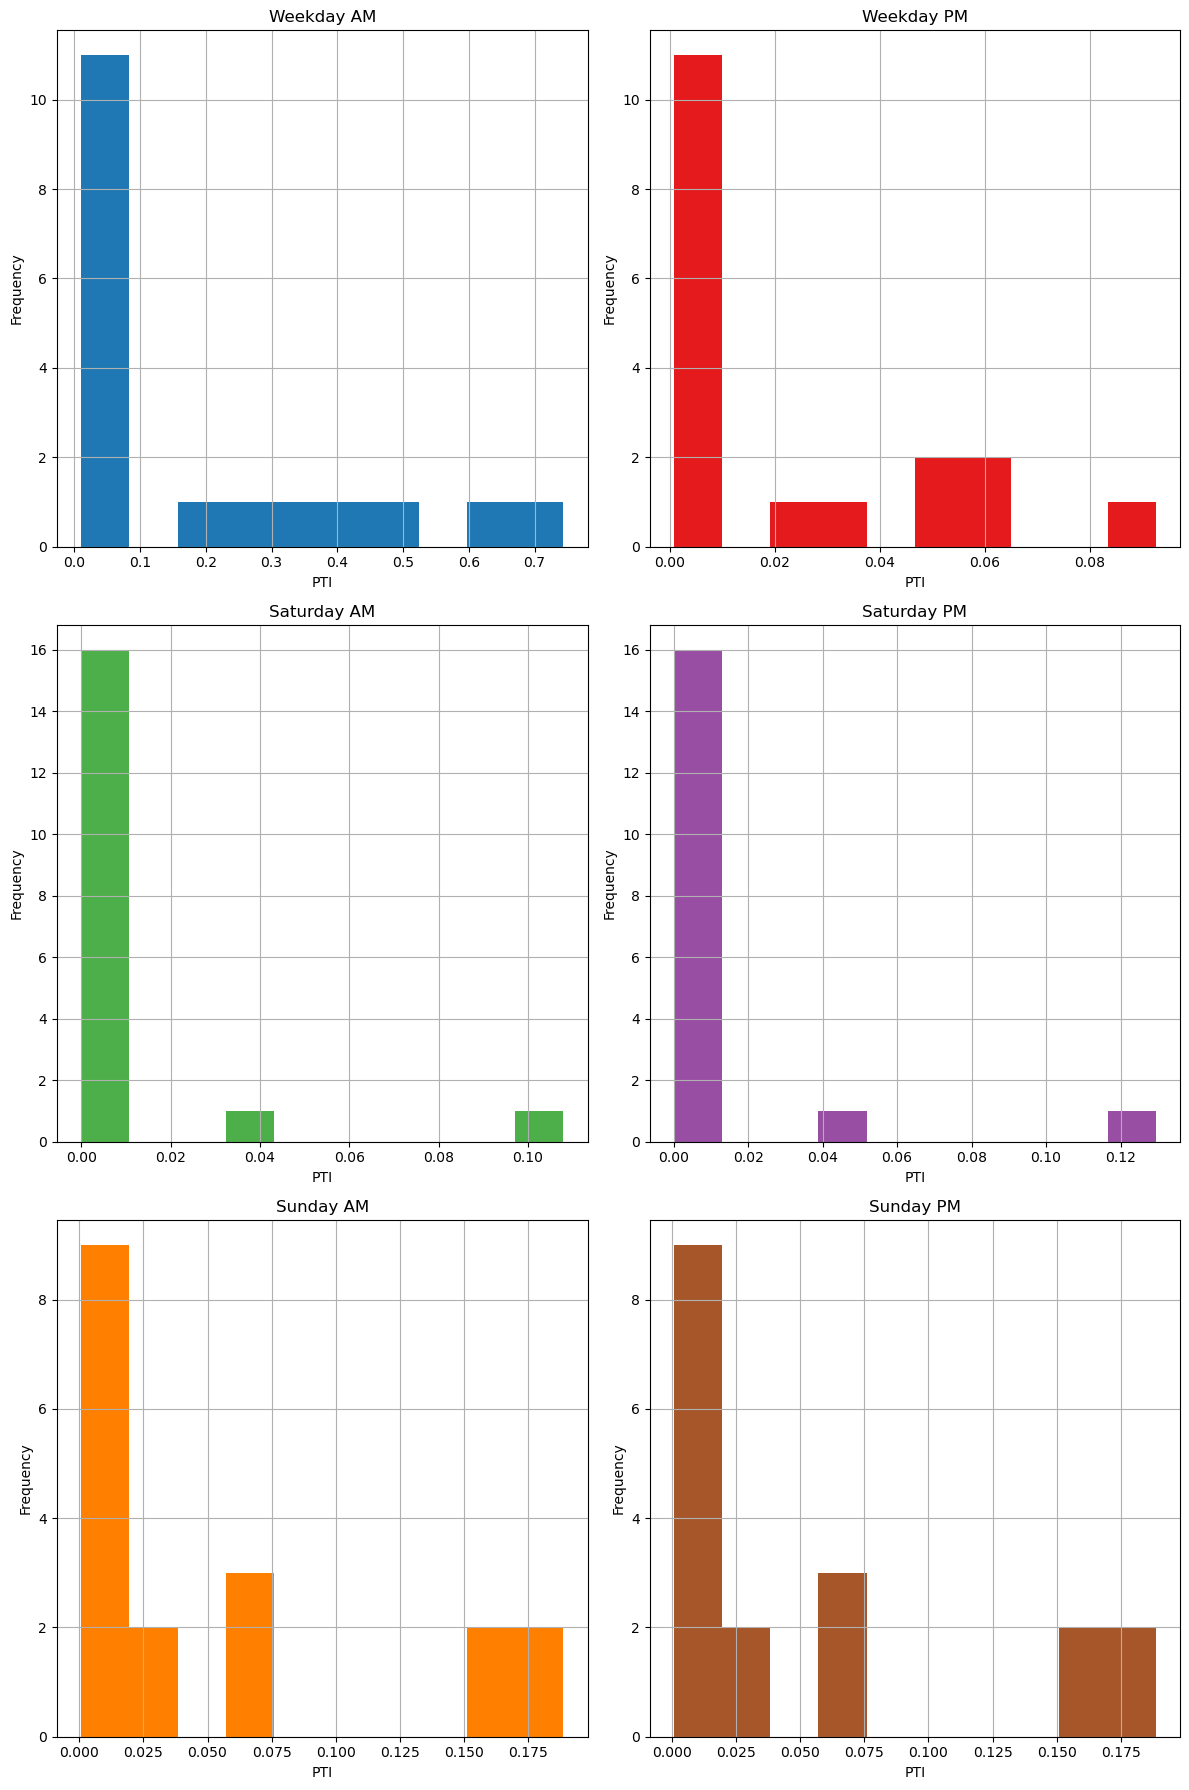

In [8]:
# Set up histogram subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

wk_am.hist("pti", color="#1f78b4", ax=axes[0, 0])
axes[0, 0].set_title("Weekday AM")
axes[0, 0].set_xlabel("PTI")
axes[0, 0].set_ylabel("Frequency")

wk_pm.hist("pti", color="#e41a1c", ax=axes[0, 1])
axes[0, 1].set_title("Weekday PM")
axes[0, 1].set_xlabel("PTI")
axes[0, 1].set_ylabel("Frequency")

sat_am.hist("pti", color="#4daf4a", ax=axes[1, 0])
axes[1, 0].set_title("Saturday AM")
axes[1, 0].set_xlabel("PTI")
axes[1, 0].set_ylabel("Frequency")

sat_pm.hist("pti", color="#984ea3", ax=axes[1, 1])
axes[1, 1].set_title("Saturday PM")
axes[1, 1].set_xlabel("PTI")
axes[1, 1].set_ylabel("Frequency")

sun_am.hist("pti", color="#ff7f00", ax=axes[2, 0])
axes[2, 0].set_title("Sunday AM")
axes[2, 0].set_xlabel("PTI")
axes[2, 0].set_ylabel("Frequency")

sun_pm.hist("pti", color="#a65628", ax=axes[2, 1])
axes[2, 1].set_title("Sunday PM")
axes[2, 1].set_xlabel("PTI")
axes[2, 1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

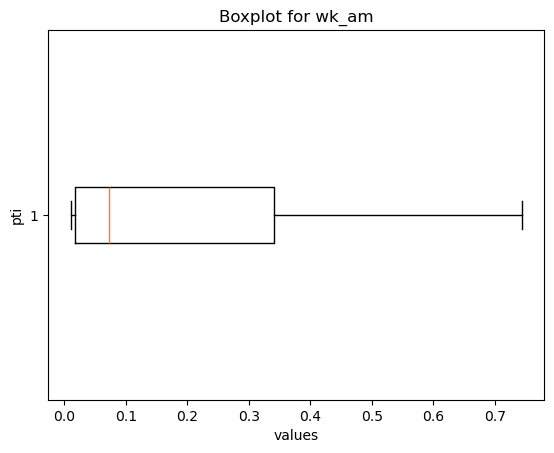

In [9]:
plt.boxplot(wk_am['pti'].dropna(), vert =False)
# Add labels and title
plt.xlabel('values')
plt.ylabel('pti')
plt.title('Boxplot for wk_am')

# Show the plot
plt.show()

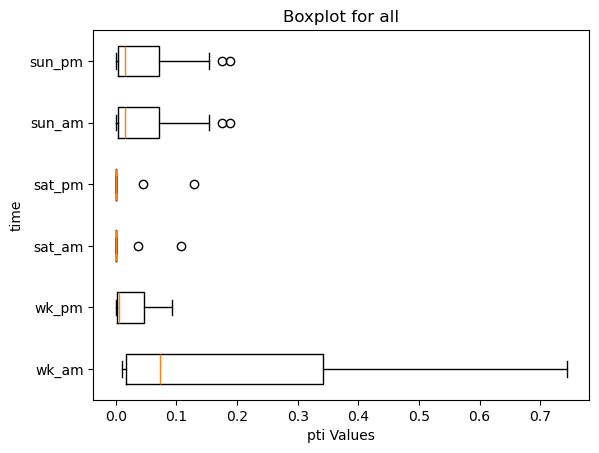

In [10]:
pti_values = [df['pti'].dropna() for df in [wk_am, wk_pm, sat_am, sat_pm, sun_am, sun_pm]]
plt.boxplot(pti_values, labels=['wk_am', 'wk_pm', 'sat_am', 'sat_pm', 'sun_am', 'sun_pm'], vert=False)

# Add labels and title
plt.xlabel('pti Values')
plt.ylabel('time')
plt.title('Boxplot for all')

# Show the plot
plt.show()

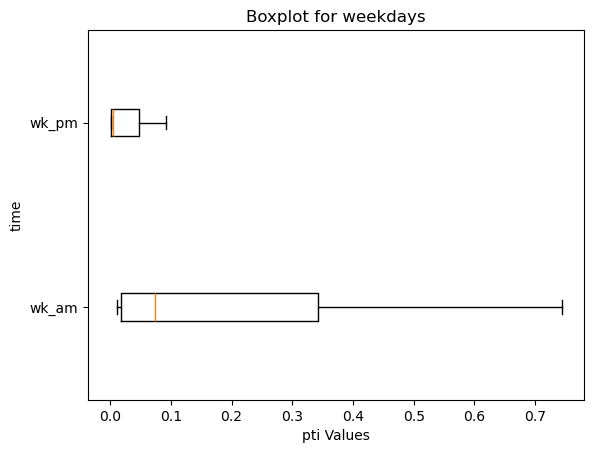

In [11]:
pti_values = [df['pti'].dropna() for df in [wk_am, wk_pm]]
plt.boxplot(pti_values, labels=['wk_am', 'wk_pm'], vert=False)

# Add labels and title
plt.xlabel('pti Values')
plt.ylabel('time')
plt.title('Boxplot for weekdays')

# Show the plot
plt.show()

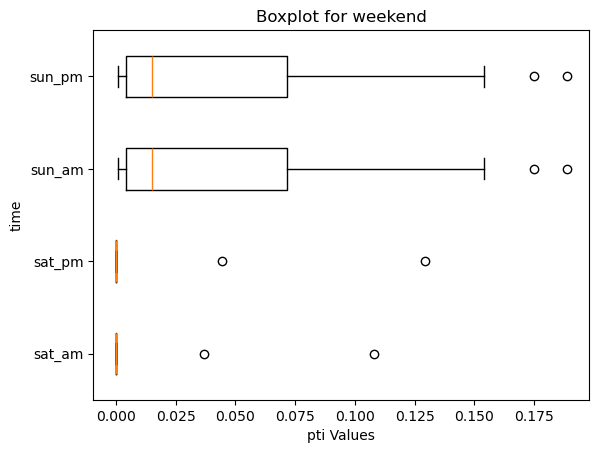

In [12]:
pti_values = [df['pti'].dropna() for df in [sat_am, sat_pm, sun_am, sun_pm]]

# Create a boxplot for all 'pti' values
plt.boxplot(pti_values, labels=['sat_am', 'sat_pm', 'sun_am', 'sun_pm'], vert = False)

# Add labels and title
plt.xlabel('pti Values')
plt.ylabel('time')
plt.title('Boxplot for weekend')

# Show the plot
plt.show()

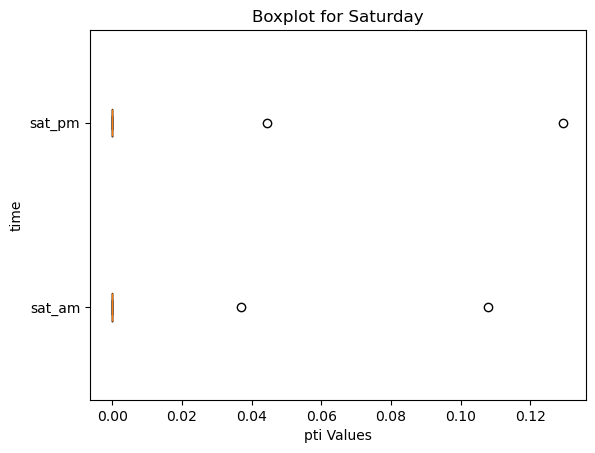

In [13]:
pti_values = [df['pti'].dropna() for df in [sat_am, sat_pm]]

# Create a boxplot for all 'pti' values
plt.boxplot(pti_values, labels=['sat_am', 'sat_pm'], vert = False)

# Add labels and title
plt.xlabel('pti Values')
plt.ylabel('time')
plt.title('Boxplot for Saturday')

# Show the plot
plt.show()

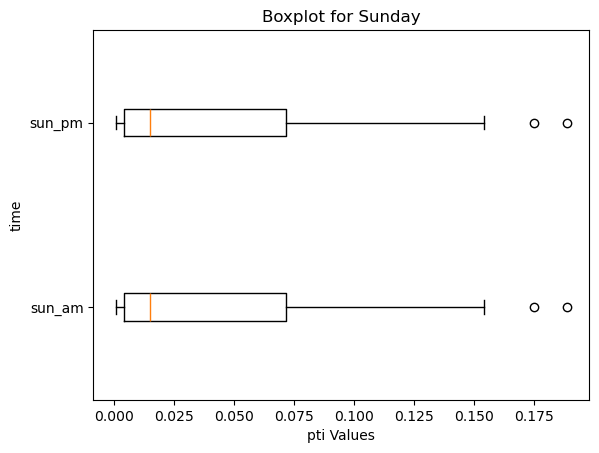

In [14]:
pti_values = [df['pti'].dropna() for df in [sun_am, sun_pm]]

# Create a boxplot for all 'pti' values
plt.boxplot(pti_values, labels=['sun_am', 'sun_pm'], vert = False)

# Add labels and title
plt.xlabel('pti Values')
plt.ylabel('time')
plt.title('Boxplot for Sunday')

# Show the plot
plt.show()

<Axes: xlabel='pti', ylabel='Density'>

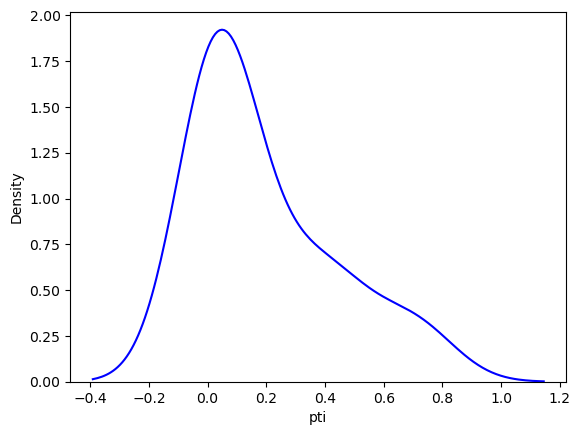

In [15]:
sns.kdeplot(wk_am["pti"], color="blue")

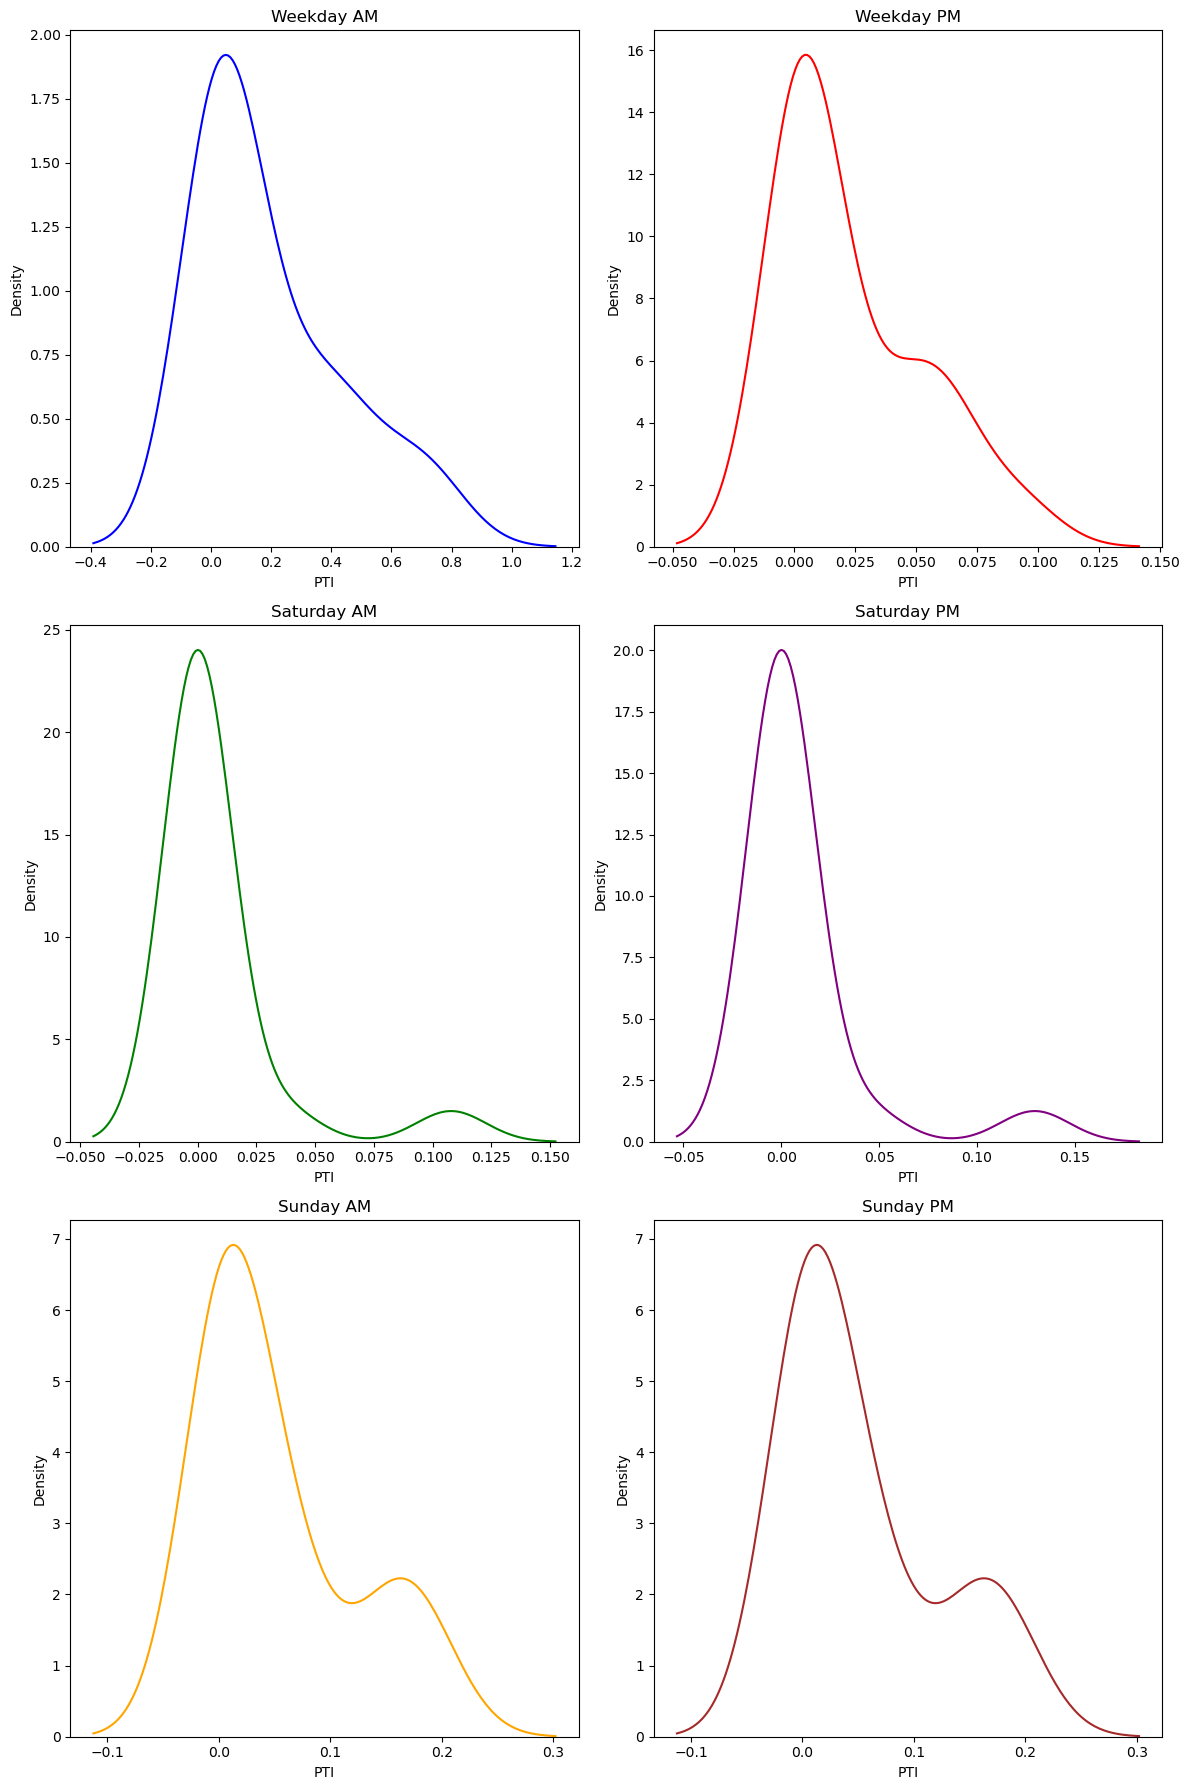

In [16]:
# Set up density plot subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

# Weekday AM
sns.kdeplot(wk_am["pti"], color="blue", ax=axes[0, 0])
axes[0, 0].set_title("Weekday AM")
axes[0, 0].set_xlabel("PTI")
axes[0, 0].set_ylabel("Density")

# Weekday PM
sns.kdeplot(wk_pm["pti"], color="red", ax=axes[0, 1])
axes[0, 1].set_title("Weekday PM")
axes[0, 1].set_xlabel("PTI")
axes[0, 1].set_ylabel("Density")

# Saturday AM
sns.kdeplot(sat_am["pti"], color="green", ax=axes[1, 0])
axes[1, 0].set_title("Saturday AM")
axes[1, 0].set_xlabel("PTI")
axes[1, 0].set_ylabel("Density")

# Saturday PM
sns.kdeplot(sat_pm["pti"], color="purple", ax=axes[1, 1])
axes[1, 1].set_title("Saturday PM")
axes[1, 1].set_xlabel("PTI")
axes[1, 1].set_ylabel("Density")

# Sunday AM
sns.kdeplot(sun_am["pti"], color="orange", ax=axes[2, 0])
axes[2, 0].set_title("Sunday AM")
axes[2, 0].set_xlabel("PTI")
axes[2, 0].set_ylabel("Density")

# Sunday PM
sns.kdeplot(sun_pm["pti"], color="brown", ax=axes[2, 1])
axes[2, 1].set_title("Sunday PM")
axes[2, 1].set_xlabel("PTI")
axes[2, 1].set_ylabel("Density")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Text(0, 0.5, 'Density')

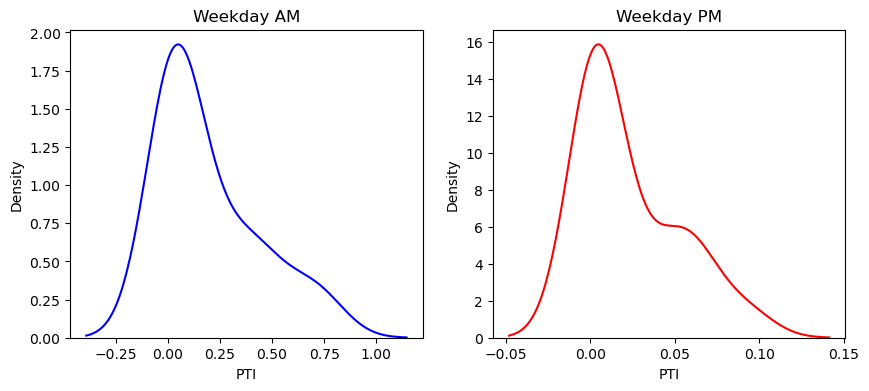

In [17]:
# Set up density plot subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Weekday AM
sns.kdeplot(wk_am["pti"], color="blue", ax=axes[0])
axes[0].set_title("Weekday AM")
axes[0].set_xlabel("PTI")
axes[0].set_ylabel("Density")

# Weekday PM
sns.kdeplot(wk_pm["pti"], color="red", ax=axes[1])
axes[1].set_title("Weekday PM")
axes[1].set_xlabel("PTI")
axes[1].set_ylabel("Density")

Text(0, 0.5, 'Density')

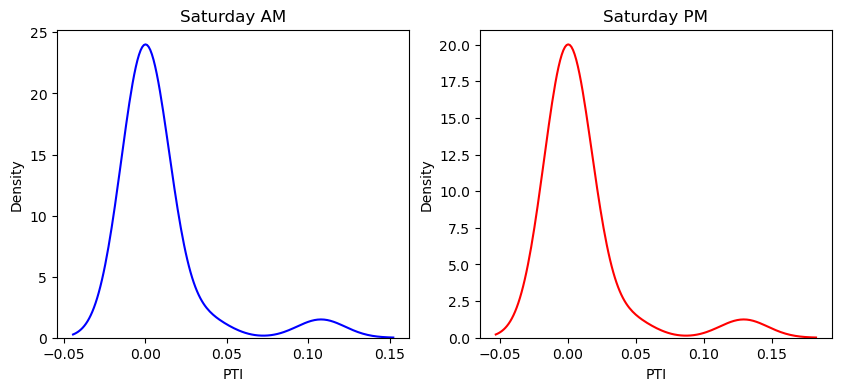

In [18]:
# Set up density plot subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Weekday AM
sns.kdeplot(sat_am["pti"], color="blue", ax=axes[0])
axes[0].set_title("Saturday AM")
axes[0].set_xlabel("PTI")
axes[0].set_ylabel("Density")

# Weekday PM
sns.kdeplot(sat_pm["pti"], color="red", ax=axes[1])
axes[1].set_title("Saturday PM")
axes[1].set_xlabel("PTI")
axes[1].set_ylabel("Density")

Text(0, 0.5, 'Density')

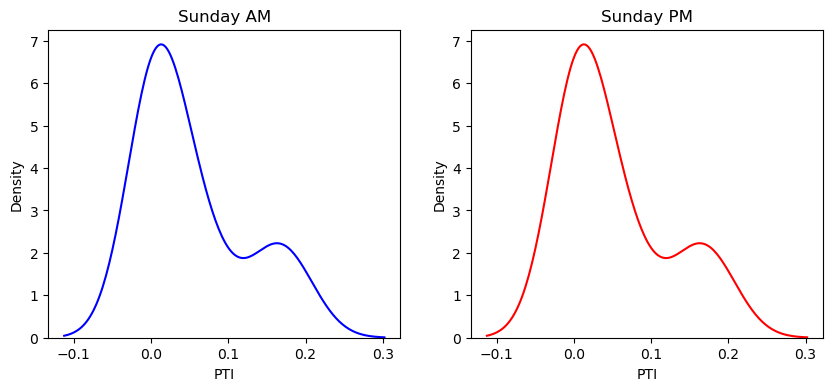

In [19]:
# Set up density plot subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Weekday AM
sns.kdeplot(sun_am["pti"], color="blue", ax=axes[0])
axes[0].set_title("Sunday AM")
axes[0].set_xlabel("PTI")
axes[0].set_ylabel("Density")

# Weekday PM
sns.kdeplot(sun_pm["pti"], color="red", ax=axes[1])
axes[1].set_title("Sunday PM")
axes[1].set_xlabel("PTI")
axes[1].set_ylabel("Density")